In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from seminartools.data import read_inflation
from seminartools.models.four_quarter_average_model import FourQuarterAverageModel

# 1. Read data

In [3]:
df_inflation = read_inflation()
df_inflation

,Country Code,IMF Country Code,Country,yearmonth,inflation
8537,ESP,184,Spain,1970-04-01,0.000000
11635,GTM,258,Guatemala,1970-04-01,0.012577
1231,AUS,193,Australia,1970-04-01,0.011236
7708,DOM,243,Dominican Republic,1970-04-01,-0.001604
21697,NZL,196,New Zealand,1970-04-01,0.015421
...,...,...,...,...,...
16098,KOR,542,"Korea, Rep.",2023-01-01,0.010538
15095,JPN,158,Japan,2023-01-01,0.004500
14347,ITA,136,Italy,2023-01-01,0.003938
21470,NOR,142,Norway,2023-01-01,0.006886


# 2. AR model per country

In [4]:
model = FourQuarterAverageModel()
model

In [5]:
df_inflation

,Country Code,IMF Country Code,Country,yearmonth,inflation
8537,ESP,184,Spain,1970-04-01,0.000000
11635,GTM,258,Guatemala,1970-04-01,0.012577
1231,AUS,193,Australia,1970-04-01,0.011236
7708,DOM,243,Dominican Republic,1970-04-01,-0.001604
21697,NZL,196,New Zealand,1970-04-01,0.015421
...,...,...,...,...,...
16098,KOR,542,"Korea, Rep.",2023-01-01,0.010538
15095,JPN,158,Japan,2023-01-01,0.004500
14347,ITA,136,Italy,2023-01-01,0.003938
21470,NOR,142,Norway,2023-01-01,0.006886


In [6]:
from warnings import filterwarnings

filterwarnings('ignore')
model.fit(df_inflation)

# 3. Evaluation

In [7]:
df_inflation["Country"].unique()

array(['Spain', 'Guatemala', 'Australia', 'Dominican Republic',
       'New Zealand', 'Italy', 'Sweden', 'Colombia', 'Paraguay', 'Peru',
       'Belgium', 'Denmark', 'United States', 'Philippines', 'Indonesia',
       'Japan', 'Finland', 'Norway', 'Greece', 'Austria', 'South Africa',
       'France', 'Mauritius', 'Luxembourg', 'Switzerland', 'Singapore',
       'Malaysia', 'Fiji', 'Turkey', 'Netherlands', 'Korea, Rep.',
       'Thailand', 'Canada', 'Ireland', 'Germany', 'United Kingdom',
       'Portugal', 'Cyprus', 'Iceland', 'Argentina'], dtype=object)

In [8]:
model.predict(df_inflation)

,yearmonth,Country,inflation
0,2023-04-01,Spain,0.012473
1,2023-04-01,Guatemala,0.022851
2,2023-04-01,Australia,0.017042
3,2023-04-01,Dominican Republic,0.015884
4,2023-04-01,New Zealand,0.016244
5,2023-04-01,Italy,0.021724
6,2023-04-01,Sweden,0.027374
7,2023-04-01,Colombia,0.031658
8,2023-04-01,Paraguay,0.017170
9,2023-04-01,Peru,0.021416


# 4. H-period ahead forecasting

In [48]:
df_inflation

,Country Code,IMF Country Code,Country,yearmonth,inflation
8537,ESP,184,Spain,1970-04-01,0.000000
11635,GTM,258,Guatemala,1970-04-01,0.012577
1231,AUS,193,Australia,1970-04-01,0.011236
7708,DOM,243,Dominican Republic,1970-04-01,-0.001604
21697,NZL,196,New Zealand,1970-04-01,0.015421
...,...,...,...,...,...
16098,KOR,542,"Korea, Rep.",2023-01-01,0.010538
15095,JPN,158,Japan,2023-01-01,0.004500
14347,ITA,136,Italy,2023-01-01,0.003938
21470,NOR,142,Norway,2023-01-01,0.006886


In [54]:
from seminartools.models.utils import h_period_ahead_forecast

forecast = h_period_ahead_forecast(model, df_inflation, "2020-01-01", h=3)
forecast

,yearmonth,Country,inflation
0,2020-01-01,Spain,0.001586
1,2020-01-01,Guatemala,0.011855
2,2020-01-01,Australia,0.003384
3,2020-01-01,Dominican Republic,0.004234
4,2020-01-01,New Zealand,0.003497
...,...,...,...
515,2023-01-01,United Kingdom,0.022409
516,2023-01-01,Portugal,0.027246
517,2023-01-01,Cyprus,0.026319
518,2023-01-01,Iceland,0.023351


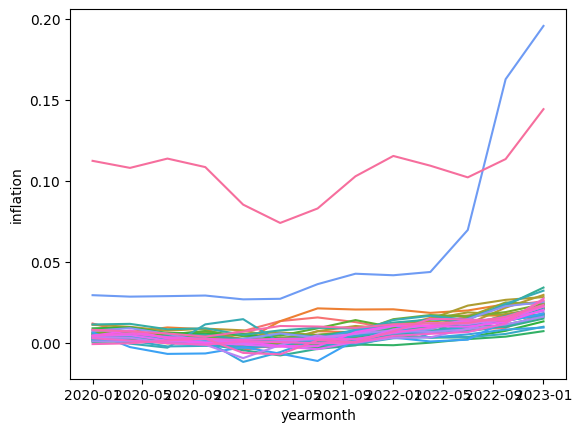

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(
    data = forecast,
    x = "yearmonth",
    y = "inflation",
    hue = "Country"
)
# turn off legend
plt.legend().remove()

# 5. Compare the forecast with the actual data

In [56]:
forecast_merged = forecast.copy().rename(columns={"inflation": "pred"})
forecast_merged = forecast_merged.merge(
    df_inflation[["Country", "yearmonth", "inflation"]],
    on=["Country", "yearmonth"],
    how="left",
).rename(columns={"inflation": "actual"})
forecast_merged.tail(100)

,yearmonth,Country,pred,actual
420,2022-07-01,South Africa,0.013429,0.027957
421,2022-07-01,France,0.007019,0.011638
422,2022-07-01,Mauritius,0.014152,0.023855
423,2022-07-01,Luxembourg,0.010710,0.002584
424,2022-07-01,Switzerland,0.003370,0.006718
...,...,...,...,...
515,2023-01-01,United Kingdom,0.022409,0.008814
516,2023-01-01,Portugal,0.027246,-0.002154
517,2023-01-01,Cyprus,0.026319,-0.008977
518,2023-01-01,Iceland,0.023351,0.025289


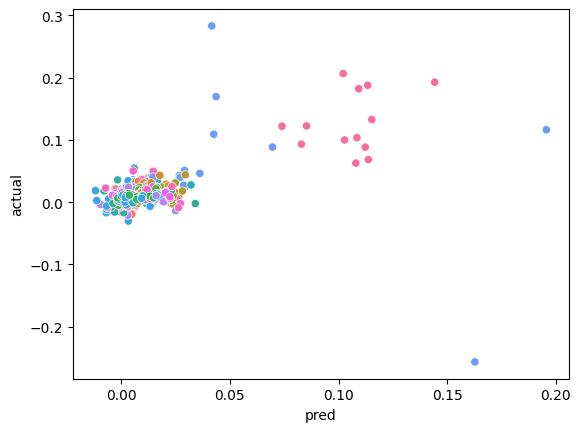

In [57]:
sns.scatterplot(
    data = forecast_merged,
    x = "pred",
    y = "actual",
    hue = "Country"
)
plt.legend().remove()

In [59]:
import statsmodels.api as sm

sm.OLS(
    forecast_merged["actual"], sm.add_constant(forecast_merged["pred"])
).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 actual   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     187.0
Date:                Tue, 12 Mar 2024   Prob (F-statistic):           1.43e-36
Time:                        14:53:37   Log-Likelihood:                 1167.1
No. Observations:                 520   AIC:                            -2330.
Df Residuals:                     518   BIC:                            -2322.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0068      0.001      5.366      0.000       0.004       0.009
pred           0.7484      0.055     13.676      0.000       0.641       0.856
==============================================================================
Omnibus:                      561.699   Durbin-Watson:                   1.669
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           283563.004
Skew:                          -4.045   Prob(JB):                         0.00
Kurtosis:                     117.114   Cond. No.                         48.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""